In [272]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime , date

import warnings
warnings.filterwarnings('ignore')

# Customer Address

In [273]:
cust_address = pd.read_excel('Raw_data.xlsx' , sheet_name='CustomerAddress')

In [274]:
cust_address.shape

(3999, 6)

In [275]:
cust_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [276]:
cust_address.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [277]:
cust_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [278]:
cust_address.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [279]:
cust_address.describe(include='object')

,address,state,country
count,3999,3999,3999
unique,3996,5,1
top,3 Mariners Cove Terrace,NSW,Australia
freq,2,2054,3999


In [280]:
cust_address.count()

customer_id           3999
address               3999
postcode              3999
state                 3999
country               3999
property_valuation    3999
dtype: int64

In [281]:
print("Total records (rows) in the dataset : {}".format(cust_address.shape[0]))
print("Total columns (features) in the dataset : {}".format(cust_address.shape[1]))

Total records (rows) in the dataset : 3999
Total columns (features) in the dataset : 6


## 1. Missing Values Check

In [282]:
cust_address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

<Axes: >

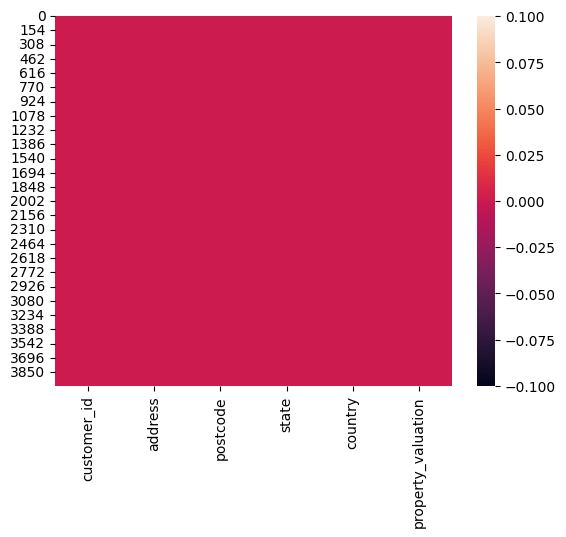

In [283]:
sns.heatmap(cust_address.isnull())

## 2. Inconsistency Check in Data

### 2.1 State

In [284]:
cust_address['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

In [285]:
# Function to replace full state names with their short forms.

def replace_state_names(state):
    
    if state == 'New South Wales' :
        return 'NSW'  
    elif state =='Victoria' :
        return 'VIC'   
    else :
        return state

# Applying the above fuction to state column

cust_address['state'] = cust_address['state'].apply(replace_state_names)

#### OR

In [286]:
# cust_address['state'] = cust_address['state'].apply(lambda x : x.replace('New South Wales', 'NSW'))
# cust_address['state'] = cust_address['state'].apply(lambda x : x.replace('Victoria ', 'VIC'))

In [287]:
cust_address['state'].value_counts()

state
NSW    2140
VIC    1021
QLD     838
Name: count, dtype: int64

In [288]:
cust_address.count()

customer_id           3999
address               3999
postcode              3999
state                 3999
country               3999
property_valuation    3999
dtype: int64

### 2.2 Country

In [289]:
cust_address['country'].value_counts()

country
Australia    3999
Name: count, dtype: int64

### 2.3 Postcode

In [290]:
cust_address[['postcode','address','state', 'country']].drop_duplicates()

,postcode,address,state,country
0,2016,060 Morning Avenue,NSW,Australia
1,2153,6 Meadow Vale Court,NSW,Australia
2,4211,0 Holy Cross Court,QLD,Australia
3,2448,17979 Del Mar Point,NSW,Australia
4,3216,9 Oakridge Court,VIC,Australia
...,...,...,...,...
3994,3064,1482 Hauk Trail,VIC,Australia
3995,4511,57042 Village Green Point,QLD,Australia
3996,2756,87 Crescent Oaks Alley,NSW,Australia
3997,4032,8194 Lien Street,QLD,Australia


## 3. Duplication Checks 

#### For checking for duplicate records we need to firstly remove the primary key column of the dataset then apply drop_duplicates() function provided by Python.

In [291]:
# Dropping the primary key column i.e customer_id and storing into a temporary dataframe.
cust_address_dedupped = cust_address.drop('customer_id', axis=1).drop_duplicates()

In [292]:
print("Number of records after removing customer_id, duplicates : {}". format(cust_address_dedupped.shape[0]))
print("Number of records in original dataset : {}". format(cust_address.shape[0]))

Number of records after removing customer_id, duplicates : 3999
Number of records in original dataset : 3999


## 4. Outlier Check

<Axes: >

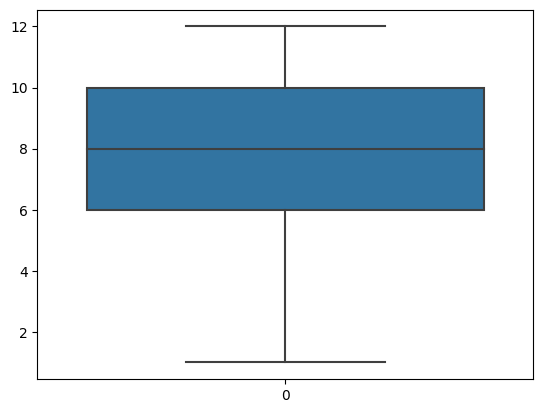

In [293]:
sns.boxplot(cust_address['property_valuation'])

In [294]:
cust_address.to_csv('CustomerAddess_Cleaned.csv', index=False)

# Customer Demographics

In [295]:
cust_dem = pd.read_excel('Raw_data.xlsx', sheet_name='CustomerDemographic')

In [296]:
cust_dem.shape

(4000, 13)

In [297]:
cust_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [298]:
cust_dem.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
5,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,â°â´âµâââ,Yes,11.0
7,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,N,(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»),No,7.0
8,9,Mala,Lind,Female,97,1973-03-10 00:00:00,Business Systems Development Analyst,Argiculture,Affluent Customer,N,0/0,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11 00:00:00,Senior Quality Engineer,Financial Services,Mass Customer,N,ð©ð½,Yes,20.0


In [299]:
cust_dem.dtypes

customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
DOB                                     object
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                      object
default                                 object
owns_car                                object
tenure                                 float64
dtype: object

In [300]:
cust_dem.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [301]:
cust_dem.describe(include='object')

,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3913,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,3448,195,9,3,2,90,2
top,Max,Pristnor,Female,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,7,45,799,2000,3998,113,2024


In [302]:
cust_dem.count()

customer_id                            4000
first_name                             4000
last_name                              3875
gender                                 4000
past_3_years_bike_related_purchases    4000
DOB                                    3913
job_title                              3494
job_industry_category                  3344
wealth_segment                         4000
deceased_indicator                     4000
default                                3698
owns_car                               4000
tenure                                 3913
dtype: int64

In [303]:
print("Total records (rows) in the dataset : {}".format(cust_dem.shape[0]))
print("Total columns (features) in the dataset : {}".format(cust_dem.shape[1]))

Total records (rows) in the dataset : 4000
Total columns (features) in the dataset : 13


## 1. Dropping Irrelevant Columns

In [304]:
cust_dem = cust_dem.drop(columns=['default'])

## 2. Missing Values Check

In [305]:
cust_dem.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [306]:
cust_dem.isnull().sum()/len(cust_dem)*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

<Axes: >

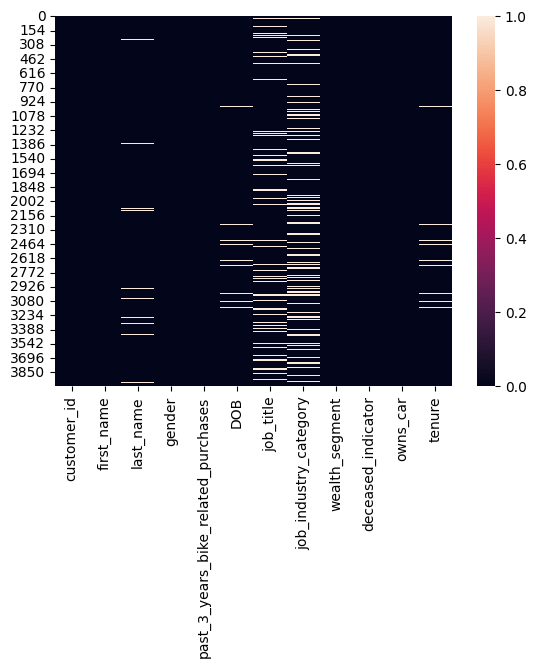

In [307]:
sns.heatmap(cust_dem.isnull())

### 2.1 Last Name

In [308]:
# Checking for the presence of first name and customer id in records where last name is missing.

cust_dem[cust_dem['last_name'].isnull()][['first_name', 'customer_id']].isnull().sum()

first_name     0
customer_id    0
dtype: int64

#### Since All customers have a customer_id and First name, all the customers are identifiable. Hence it is okay for to not have a last name. Filling null last names with "None".

In [309]:
cust_dem['last_name'].fillna('None', axis = 0, inplace = True)

In [310]:
cust_dem['last_name'].isnull().sum()

0

### 2.2 DOB

In [311]:
cust_dem[cust_dem['DOB'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaN,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaN,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaN,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaN,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaN,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaN,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaN,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaN,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaN,NaN,IT,High Net Worth,N,Yes,NaN


#### Since less than 5 % of data has null date of birth. we can remove the records where date of birth is null.

In [312]:
dob_index_drop = cust_dem[cust_dem['DOB'].isnull()].index
dob_index_drop

Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,  581,
        598,  679,  684,  798,  838,  882,  891,  949,  974,  982,  995, 1037,
       1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582, 1627, 1682, 1739,
       1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020, 2068, 2164, 2204, 2251,
       2294, 2334, 2340, 2413, 2425, 2468, 2539, 2641, 2646, 2695, 2696, 2853,
       2919, 2962, 2998, 3011, 3085, 3150, 3221, 3222, 3254, 3287, 3297, 3311,
       3321, 3342, 3364, 3472, 3509, 3512, 3564, 3653, 3717, 3726, 3778, 3882,
       3930, 3934, 3997],
      dtype='int64')

In [313]:
cust_dem.drop(index= dob_index_drop, inplace=True, axis = 0)

In [314]:
cust_dem['DOB'].isnull().sum()

0

### 2.3 Job Title

In [315]:
# Fetching records where Job Title is missing.

cust_dem[cust_dem['job_title'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,None,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0
5,6,Curr,Duckhouse,Male,35,1966-09-16 00:00:00,NaN,Retail,High Net Worth,N,Yes,13.0
6,7,Fina,Merali,Female,6,1976-02-23 00:00:00,NaN,Financial Services,Affluent Customer,N,Yes,11.0
10,11,Uriah,Bisatt,Male,99,1954-04-30 00:00:00,NaN,Property,Mass Customer,N,No,9.0
21,22,Deeanne,Durtnell,Female,79,1962-12-10 00:00:00,NaN,IT,Mass Customer,N,No,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3968,Alexandra,Kroch,Female,99,1977-12-22 00:00:00,NaN,Property,High Net Worth,N,No,22.0
3971,3972,Maribelle,Schaffel,Female,6,1979-03-28 00:00:00,NaN,Retail,Mass Customer,N,No,8.0
3978,3979,Kleon,Adam,Male,67,1974-07-13 00:00:00,NaN,Financial Services,Mass Customer,N,Yes,18.0
3986,3987,Beckie,Wakeham,Female,18,1964-05-29 00:00:00,NaN,Argiculture,Mass Customer,N,No,7.0


In [316]:
cust_dem['job_title'].unique()

array(['Executive Secretary', 'Administrative Officer',
       'Recruiting Manager', nan, 'Senior Editor', 'Media Manager I',
       'Business Systems Development Analyst', 'Senior Quality Engineer',
       'Nuclear Power Engineer', 'Developer I', 'Account Executive',
       'Junior Executive', 'Media Manager IV', 'Sales Associate',
       'Professor', 'Geological Engineer', 'Project Manager',
       'Safety Technician I', 'Research Assistant I',
       'Accounting Assistant III', 'Editor', 'Research Nurse',
       'Safety Technician III', 'Staff Accountant III', 'Legal Assistant',
       'Product Engineer', 'Information Systems Manager',
       'VP Quality Control', 'Social Worker', 'Senior Cost Accountant',
       'Assistant Media Planner', 'Payment Adjustment Coordinator',
       'Food Chemist', 'Accountant III', 'Director of Sales',
       'Senior Financial Analyst', 'Registered Nurse',
       'Biostatistician II', 'Computer Systems Analyst II',
       'Software Test Engineer II', 

In [317]:
cust_dem['job_title'].value_counts()

job_title
Business Systems Development Analyst    43
Tax Accountant                          43
Social Worker                           42
Recruiting Manager                      41
Internal Auditor                        40
                                        ..
Database Administrator II                4
Health Coach III                         3
Health Coach I                           3
Research Assistant III                   3
Developer I                              1
Name: count, Length: 195, dtype: int64

In [318]:
cust_dem['job_title'].mode()

0    Business Systems Development Analyst
1                          Tax Accountant
Name: job_title, dtype: object

In [319]:
job_title_mode = cust_dem['job_title'].mode() [0]
cust_dem['job_title'].fillna(job_title_mode, inplace =True)

In [320]:
cust_dem['job_title'].isnull().sum()

0

### 2.4 Job Industry Category   

In [321]:
cust_dem[cust_dem['job_industry_category'].isnull()]   

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
7,8,Rod,Inder,Male,31,1962-03-30 00:00:00,Media Manager I,NaN,Mass Customer,N,No,7.0
15,16,Harlin,Parr,Male,38,1977-02-27 00:00:00,Media Manager IV,NaN,Mass Customer,N,Yes,18.0
16,17,Heath,Faraday,Male,57,1962-03-19 00:00:00,Sales Associate,NaN,Affluent Customer,N,Yes,15.0
17,18,Marjie,Neasham,Female,79,1967-07-06 00:00:00,Professor,NaN,Affluent Customer,N,No,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3965,3966,Astrix,Sigward,Female,53,1968-09-15 00:00:00,Geologist I,NaN,Mass Customer,N,Yes,11.0
3973,3974,Misha,Ranklin,Female,82,1961-02-11 00:00:00,Technical Writer,NaN,Affluent Customer,N,Yes,9.0
3975,3976,Gretel,Chrystal,Female,0,1957-11-20 00:00:00,Internal Auditor,NaN,Affluent Customer,N,Yes,13.0
3982,3983,Jarred,Lyste,Male,19,1965-04-21 00:00:00,Graphic Designer,NaN,Mass Customer,N,Yes,9.0


In [322]:
cust_dem['job_industry_category'].unique()

array(['Health', 'Financial Services', 'Property', 'IT', nan, 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [323]:
cust_dem['job_industry_category'].value_counts()

job_industry_category
Manufacturing         796
Financial Services    767
Health                596
Retail                358
Property              267
IT                    152
Entertainment         136
Argiculture           113
Telecommunications     72
Name: count, dtype: int64

In [324]:
cust_dem['job_industry_category'].fillna('Missing', inplace=True, axis=0)
cust_dem['job_industry_category'].isnull().sum()

0

### 2.5 Tenure


#### When Date of Birth was Null the Tenure was also Null. Hence after removing null DOBs from dataframe , null tenures were also removed.

In [325]:
cust_dem['tenure'].isnull().sum()

0

In [326]:
cust_dem.isnull().mean()*100

customer_id                            0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
DOB                                    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
owns_car                               0.0
tenure                                 0.0
dtype: float64

## Inconsistency Check

#### 3.1 Gender

In [327]:
cust_dem['gender'].value_counts()

gender
Female    2037
Male      1872
F            1
U            1
Femal        1
M            1
Name: count, dtype: int64

In [328]:
def replace_gender_names(gender):
    
    # Making Gender as Male and Female as standards
    if gender=='M':
        return 'Male'
    elif gender=='F':
        return 'Female'
    elif gender=='Femal':
        return 'Female'
    else :
        return gender

cust_dem['gender'] = cust_dem['gender'].apply(replace_gender_names)

### 3.2 DOB

In [329]:
cust_dem['DOB']

0       1953-10-12 00:00:00
1       1980-12-16 00:00:00
2       1954-01-20 00:00:00
3       1961-10-03 00:00:00
4       1977-05-13 00:00:00
               ...         
3994    1975-12-12 00:00:00
3995    1975-08-09 00:00:00
3996    2001-07-13 00:00:00
3998    1973-10-24 00:00:00
3999    1991-11-05 00:00:00
Name: DOB, Length: 3913, dtype: object

#### Creating Age Column for checking further descripency in data

In [330]:
# Function to calculate the age as of today based on the DOB of the customer.

cust_dem['DOB'] = pd.to_datetime(cust_dem['DOB'])

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

cust_dem['age'] = cust_dem['DOB'].apply(calculate_age)
print(cust_dem['age'])

0       69
1       42
2       69
3       61
4       46
        ..
3994    47
3995    47
3996    22
3998    49
3999    31
Name: age, Length: 3913, dtype: int64


#### Creating Age group for further analysis

In [331]:
#cust_dem['Age Group'] = cust_dem['age'].apply(lambda x : (math.floor(x/10)+1)*10)

In [332]:
cust_dem['age_group'] = pd.cut(cust_dem['age'], bins=[0,20,30,40,50,60,70,80,90], labels=['20','30','40','50','60','70','80','90'])

In [333]:
cust_dem.head(10)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69,70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42,50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69,70
3,4,Talbot,None,Male,33,1961-10-03,Business Systems Development Analyst,IT,Mass Customer,N,No,7.0,61,70
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,46,50
5,6,Curr,Duckhouse,Male,35,1966-09-16,Business Systems Development Analyst,Retail,High Net Worth,N,Yes,13.0,56,60
6,7,Fina,Merali,Female,6,1976-02-23,Business Systems Development Analyst,Financial Services,Affluent Customer,N,Yes,11.0,47,50
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,Missing,Mass Customer,N,No,7.0,61,70
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,50,50
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,34,40


In [334]:
# Viz to find out the Age Group Distribution
plt.figure(figsize=(10,8))
sns.distplot(new_cust['Age Group'], kde=False, bins=50)

NameError: name 'new_cust' is not defined

<Figure size 1000x800 with 0 Axes>

### 3.3 Wealth Segment

In [ ]:
cust_dem['wealth_segment'].value_counts()

wealth_segment
Mass Customer        1954
High Net Worth        996
Affluent Customer     963
Name: count, dtype: int64

#### There is no inconsistent data in wealth_segment column.

### 3.4 Deceased Indicator

In [ ]:
cust_dem['deceased_indicator'].value_counts()

deceased_indicator
N    3911
Y       2
Name: count, dtype: int64

#### There is no inconsistent data in deceased_indicator column.

### 3.5 Owns a Car

In [ ]:
cust_dem['owns_car'].value_counts()

owns_car
Yes    1974
No     1939
Name: count, dtype: int64

#### There is no inconsistent data in owns_car column.


### 4. Duplication Check

In [ ]:
cust_dem_dedupped = cust_dem.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(cust_dem_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(cust_dem.shape[0]))

Number of records after removing customer_id (pk), duplicates : 3913
Number of records in original dataset : 3913


#### Since both the numbers are same. There are no duplicate records in the dataset.

### 5. Outlier Check

<Axes: >

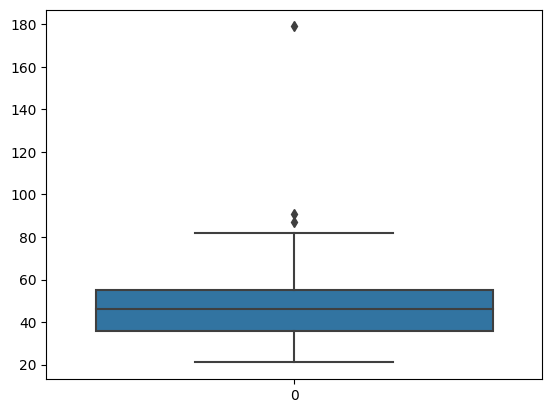

In [ ]:
sns.boxplot(cust_dem['age'])

<Axes: xlabel='age'>

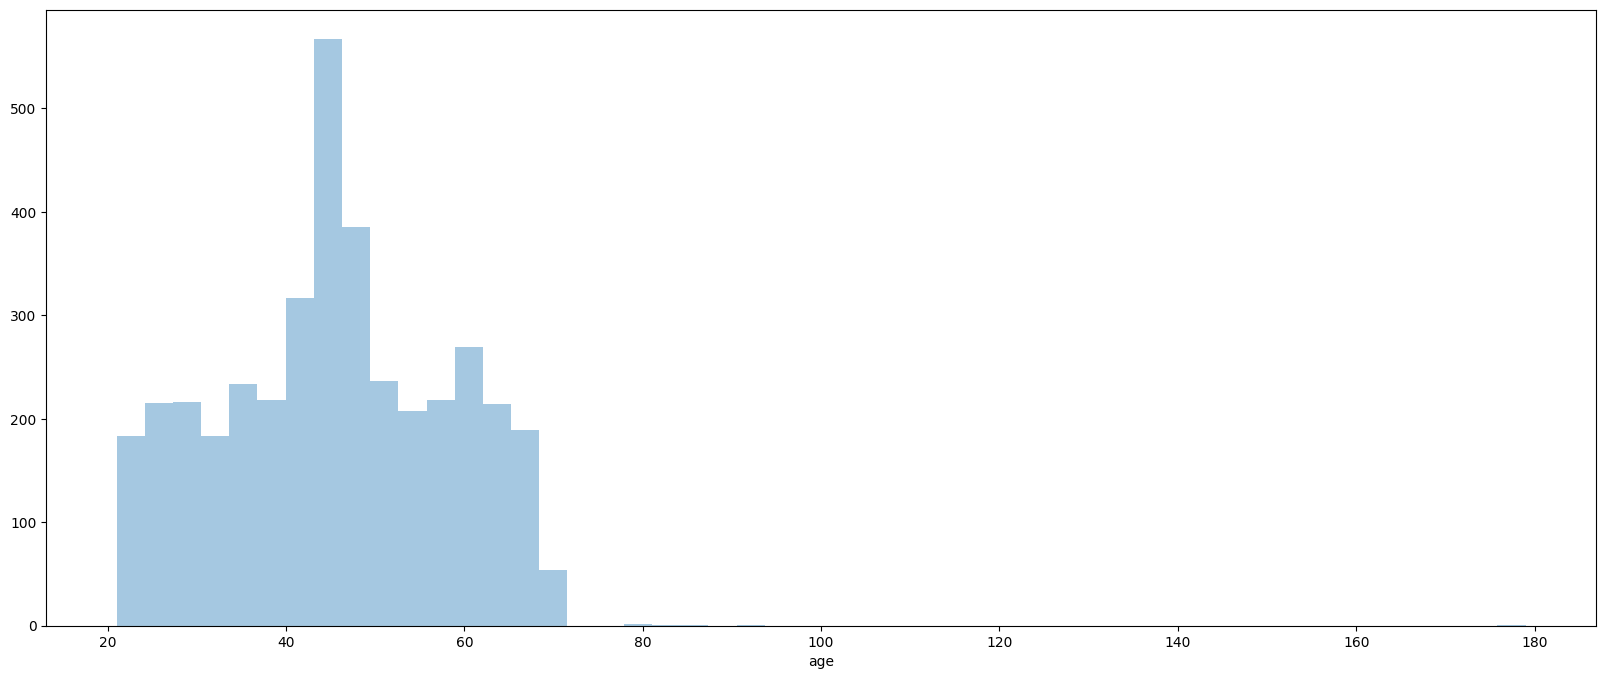

In [ ]:
plt.figure(figsize=(20,8))
sns.distplot(cust_dem['age'], kde=False, bins=50)

In [ ]:
cust_dem[cust_dem['age'] > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,179


#### Here we see a customer with age 177 which is an outlier. hence we need to remove this record.

In [ ]:
age_index_drop = cust_dem[cust_dem['age']>100].index
cust_dem.drop(index=age_index_drop, inplace=True, axis=0)

In [ ]:
cust_dem.to_csv('CustomerDemographic_Cleaned.csv', index = False)

# New Customers

In [ ]:
new_cus = pd.read_excel('Raw_data.xlsx', sheet_name='NewCustomerList')

In [ ]:
new_cus.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.45,0.5625,0.703125,0.597656,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.94,0.9400,1.175000,0.998750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.44,0.4400,0.440000,0.440000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.81,1.0125,1.012500,1.012500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.59,0.5900,0.737500,0.737500,4,4,1.703125


In [ ]:
new_cus.shape

(1000, 23)

In [ ]:
new_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [ ]:
print('Total records(rows) in the dataset : {}'. format(new_cus.shape[0]))
print('Total records(columns) in the dataset : {}'. format(new_cus.shape[1]))

Total records(rows) in the dataset : 1000
Total records(columns) in the dataset : 23


In [ ]:
new_cus.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.740630,0.833115,0.936461,0.865306,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.200436,0.249232,0.298709,0.286303,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.570000,0.630000,0.700000,0.646000,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.730000,0.810000,0.906250,0.837500,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.910000,1.014375,1.125000,1.049414,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [ ]:
new_cus.describe(include = 'object')

,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,state,country
count,1000,971,1000,983,894,835,1000,1000,1000,1000,1000,1000
unique,940,961,3,961,184,9,3,1,2,1000,3,1
top,Rozamond,Sissel,Female,1965-07-03,Associate Professor,Financial Services,Mass Customer,N,No,45 Shopko Center,NSW,Australia
freq,3,2,513,2,15,203,508,1000,507,1,506,1000


### 1. Droping Irrelevent Columns

In [349]:
new_cus.drop(columns = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1 , inplace=True)

In [ ]:
new_cus.shape

(1000, 18)

### 2. Missing Values Check

In [335]:
new_cus.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [336]:
new_cus.isnull().sum()/len(new_cus)*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Unnamed: 16                             0.0
Unnamed: 17                             0.0
Unnamed: 18                             0.0
Unnamed: 19                             0.0
Unnamed: 20                             0.0
Rank                                    0.0
Value                           

<Axes: >

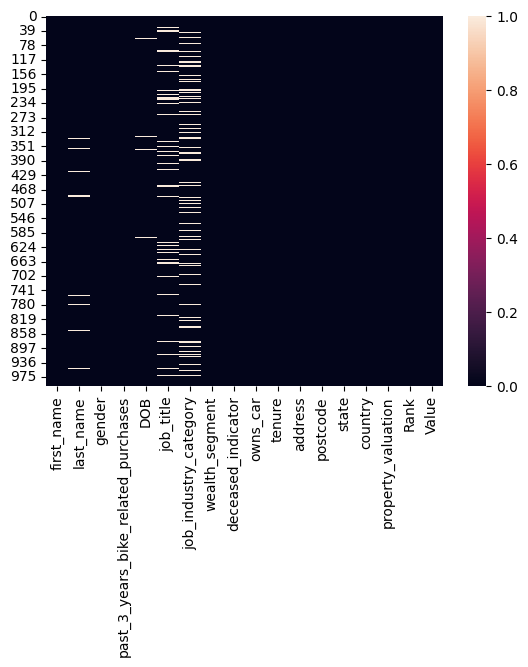

In [ ]:
sns.heatmap(new_cus.isnull())

### 2.1 Last Name

In [ ]:
new_cus[new_cus['last_name'].isnull()][['first_name']].isnull().sum()

first_name    0
dtype: int64

#### Since All customers have a First name, all the customers are identifiable. Hence it is okay for to not have a last name. Filling null last names with "None"

In [347]:
new_cus['last_name'].fillna('None', axis = 0, inplace = True)

In [348]:
new_cus['last_name'].isnull().sum()

0

### 2.2 Date of Birth

In [ ]:
new_cus[new_cus['DOB'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaN,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
226,Hatti,Carletti,U,35,NaN,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
324,Rozamond,Turtle,U,69,NaN,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
358,Tamas,Swatman,U,65,NaN,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
360,Tracy,Andrejevic,U,71,NaN,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
374,Agneta,McAmish,U,66,NaN,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
434,Gregg,Aimeric,U,52,NaN,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
439,Johna,Bunker,U,93,NaN,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
574,Harlene,Nono,U,69,NaN,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
598,Gerianne,Kaysor,U,15,NaN,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


#### Less than 5 % of data has null date of birth. we can remove the records where date of birth is null

In [337]:
dob_drop_index = new_cus[new_cus['DOB'].isnull()].index
dob_drop_index

Index([ 59, 226, 324, 358, 360, 374, 434, 439, 574, 598, 664, 751, 775, 835,
       883, 904, 984],
      dtype='int64')

In [338]:
new_cus.drop(index=dob_drop_index, inplace=True, axis=0)

In [ ]:
new_cus['DOB'].isnull().sum()

0

### 2.3 Job Title

In [339]:
new_cus[new_cus['job_title'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,...,NSW,Australia,8,0.82,1.0250,1.281250,1.281250,16,16,1.562500
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,...,QLD,Australia,4,0.90,0.9000,0.900000,0.765000,26,26,1.468750
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,...,VIC,Australia,10,0.68,0.6800,0.850000,0.850000,30,30,1.460938
30,Sharron,Claibourn,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,...,NSW,Australia,8,1.01,1.2625,1.262500,1.262500,30,30,1.460938
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,...,VIC,Australia,8,0.44,0.4400,0.440000,0.374000,38,38,1.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,Candy,NaN,Female,23,1977-12-08,NaN,Financial Services,Mass Customer,N,No,...,VIC,Australia,3,0.52,0.5200,0.520000,0.442000,951,951,0.450500
953,Noami,Cokly,Female,74,1962-09-17,NaN,Manufacturing,Mass Customer,N,Yes,...,NSW,Australia,11,0.41,0.5125,0.640625,0.544531,954,954,0.450000
971,Frieda,Tavinor,Female,43,1999-03-04,NaN,NaN,Affluent Customer,N,No,...,VIC,Australia,6,0.53,0.5300,0.530000,0.530000,972,972,0.430000
972,Ellwood,Budden,Male,82,1998-06-03,NaN,Health,Mass Customer,N,Yes,...,NSW,Australia,10,1.08,1.3500,1.687500,1.434375,972,972,0.430000


In [340]:
new_cus['job_title'].nunique

<bound method IndexOpsMixin.nunique of 0                   General Manager
1               Structural Engineer
2            Senior Cost Accountant
3        Account Representative III
4                 Financial Analyst
                   ...             
995                       Paralegal
996          Senior Sales Associate
997    Budget/Accounting Analyst IV
998               Financial Advisor
999             Staff Accountant IV
Name: job_title, Length: 983, dtype: object>

In [341]:
job_title_mode = new_cus['job_title'].mode() [0]
new_cus['job_title'].fillna(job_title_mode, inplace =True)

In [342]:
new_cus['job_title'].isnull().sum()

0

### 2.4 Job Industry Category

In [343]:
new_cus[new_cus['job_industry_category'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,...,QLD,Australia,4,0.77,0.770,0.770,0.6545,23,23,1.500000
23,Tabbatha,Averill,Female,5,1977-12-17 00:00:00,Quality Control Specialist,NaN,Affluent Customer,N,Yes,...,NSW,Australia,8,0.54,0.675,0.675,0.6750,23,23,1.500000
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,...,QLD,Australia,9,0.40,0.400,0.500,0.4250,32,32,1.453125
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,...,NSW,Australia,10,0.50,0.500,0.625,0.6250,36,36,1.447656
43,Corinna,Suggey,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,N,No,...,NSW,Australia,8,0.68,0.680,0.680,0.6800,44,44,1.421094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Blondell,Dibdall,Female,62,1967-01-03,Programmer III,NaN,Mass Customer,N,No,...,VIC,Australia,4,1.10,1.100,1.100,0.9350,960,960,0.442000
971,Frieda,Tavinor,Female,43,1999-03-04,Associate Professor,NaN,Affluent Customer,N,No,...,VIC,Australia,6,0.53,0.530,0.530,0.5300,972,972,0.430000
975,Amby,Bodega,Male,63,1968-06-12,Recruiter,NaN,Affluent Customer,N,Yes,...,VIC,Australia,6,1.08,1.350,1.350,1.3500,974,974,0.425000
980,Tyne,Anshell,Female,71,1992-04-08,Mechanical Systems Engineer,NaN,Mass Customer,N,Yes,...,NSW,Australia,8,0.48,0.600,0.600,0.5100,979,979,0.416500


In [344]:
#Since Percentage of missing Job Industry Category is 16%. We will replace null values with Missing.

new_cus['job_industry_category'].fillna('Missing', inplace=True, axis=0)
new_cus['job_industry_category'].isnull().sum()

0

In [350]:
new_cus.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [356]:
new_cus.value_counts().sum()

983

## 3. Inconsistency Check

#### We will check whether there is inconsistent data / typo error data is present in the categorical columns.

In [ ]:
new_cus['gender'].value_counts()

gender
Female    513
Male      470
U          17
Name: count, dtype: int64

#### Creating age cloumn from DOB

In [351]:
new_cus['DOB'] = pd.to_datetime(new_cus['DOB'])

def find_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

new_cus['age'] = new_cus['DOB'].apply(find_age)
print(new_cus['age'])

0      66
1      53
2      48
3      44
4      57
       ..
995    63
996    21
997    68
998    70
999    67
Name: age, Length: 983, dtype: int64


In [352]:
new_cus['age'].describe()

count    983.000000
mean      51.786368
std       17.066932
min       21.000000
25%       40.000000
50%       51.000000
75%       65.000000
max       85.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

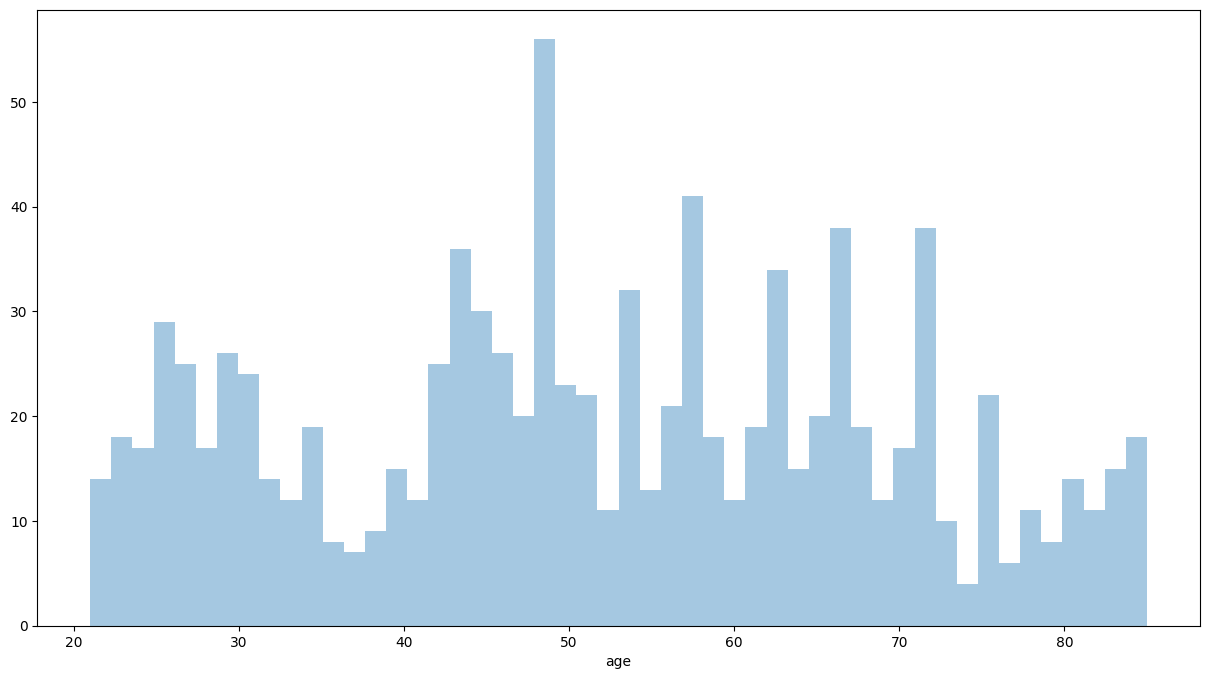

In [363]:
# Viz to find out the Age Distribution
plt.figure(figsize=(15,8))
sns.distplot(new_cus['age'], kde=False, bins=50)

#### Age Group

In [358]:
new_cus['age_group'] = pd.cut(new_cus['age'], bins = [0,20,30,40,50,60,70,80,90], labels = ['20','30','40','50','60','70','80','90'])

<Axes: xlabel='age_group'>

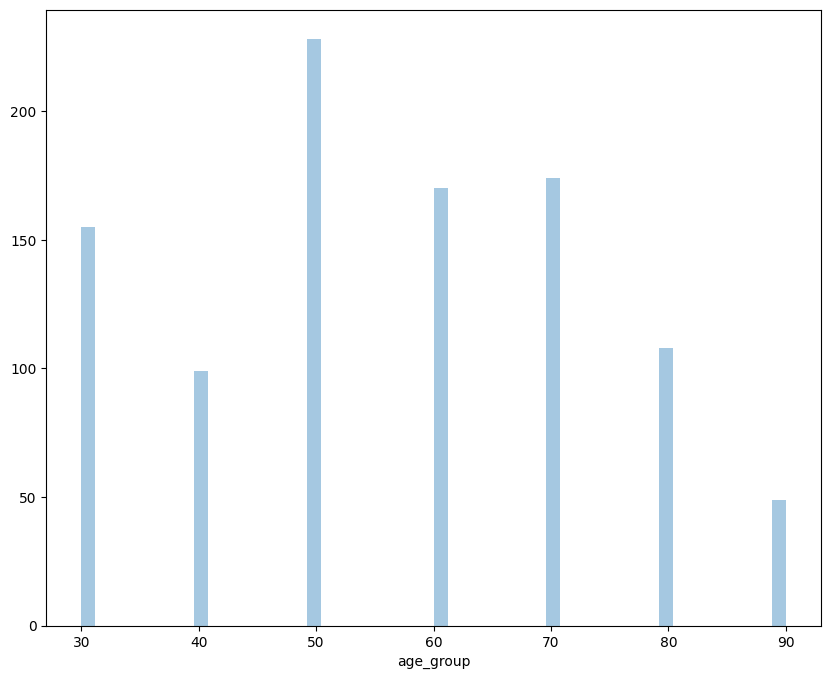

In [361]:
# Viz to find out the Age Group Distribution
plt.figure(figsize=(10,8))
sns.distplot(new_cus['age_group'], kde=False, bins=50)

In [ ]:
new_cus.head(10)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,66.0,70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53.0,60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,48.0,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44.0,50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,57.0,60
5,Druci,Brandli,Female,39,1951-04-29,Assistant Media Planner,Entertainment,High Net Worth,N,Yes,22,89105 Pearson Terrace,4075,QLD,Australia,7,6,1.671875,72.0,80
6,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,N,No,8,7 Nevada Crossing,2620,NSW,Australia,7,6,1.671875,46.0,50
7,Nancie,Vian,Female,74,1972-12-27,Human Resources Assistant II,Retail,Mass Customer,N,Yes,10,85 Carioca Point,4814,QLD,Australia,5,8,1.656250,50.0,50
8,Duff,Karlowicz,Male,50,1972-04-28,Speech Pathologist,Manufacturing,Mass Customer,N,Yes,5,717 West Drive,2200,NSW,Australia,10,8,1.656250,51.0,60
9,Barthel,Docket,Male,72,1985-08-02,Accounting Assistant IV,IT,Mass Customer,N,Yes,17,80 Scofield Junction,4151,QLD,Australia,5,10,1.640625,38.0,40


In [ ]:
new_cus['wealth_segment'] . value_counts()

wealth_segment
Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: count, dtype: int64

In [ ]:
new_cus['deceased_indicator'].value_counts()

deceased_indicator
N    983
Name: count, dtype: int64

In [ ]:
new_cus['owns_car'].value_counts()

owns_car
No     497
Yes    486
Name: count, dtype: int64

In [ ]:
new_cus['state'].value_counts()

state
NSW    499
VIC    258
QLD    226
Name: count, dtype: int64

In [ ]:
new_cus['country'].value_counts()

country
Australia    983
Name: count, dtype: int64

In [ ]:
new_cus[['address', 'postcode','state','country']]

,address,postcode,state,country
0,45 Shopko Center,4500,QLD,Australia
1,14 Mccormick Park,2113,NSW,Australia
2,5 Colorado Crossing,3505,VIC,Australia
3,207 Annamark Plaza,4814,QLD,Australia
4,115 Montana Place,2093,NSW,Australia
...,...,...,...,...
995,2 Sloan Way,2200,NSW,Australia
996,04 Union Crossing,2196,NSW,Australia
997,33475 Fair Oaks Junction,4702,QLD,Australia
998,57666 Victoria Way,4215,QLD,Australia


In [ ]:
new_cus[['address', 'postcode','state','country']].sort_values('address')

,address,postcode,state,country
721,0 Bay Drive,2750,NSW,Australia
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
...,...,...,...,...
308,99 Westend Court,2287,NSW,Australia
336,990 Hoffman Avenue,3029,VIC,Australia
796,99376 Namekagon Street,3101,VIC,Australia
583,9940 Manley Drive,2574,NSW,Australia


In [ ]:
new_cus['tenure'].describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

<Axes: xlabel='tenure', ylabel='Density'>

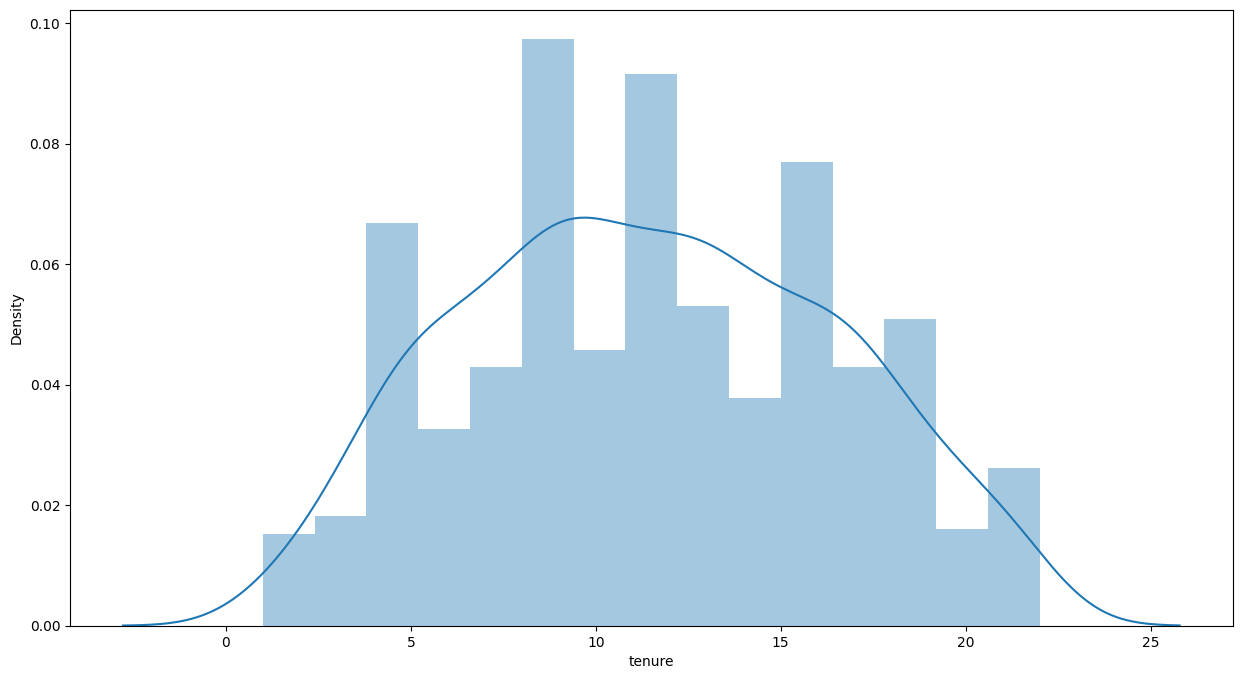

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(new_cus['tenure'])

## 4. Duplication Check

In [364]:
new_cus_dedupped = new_cus.drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(new_cus_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(new_cus.shape[0]))

Number of records after removing customer_id (pk), duplicates : 983
Number of records in original dataset : 983


#### Since both the numbers are same. There are no duplicate records in the dataset.

## 5. Outlier Check

<Axes: >

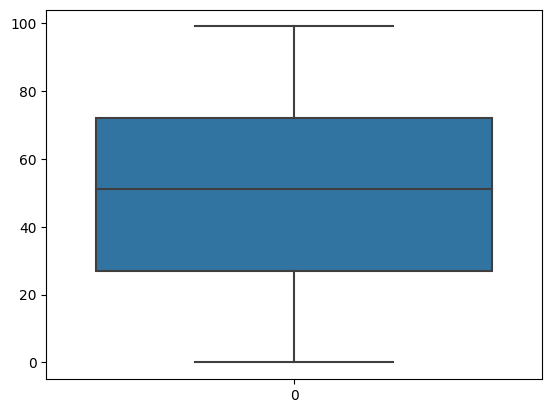

In [ ]:
sns.boxplot(new_cus['past_3_years_bike_related_purchases'])

<Axes: >

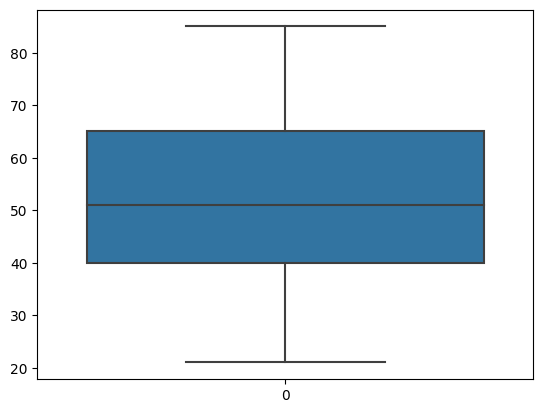

In [ ]:
sns.boxplot(new_cus['age'])

<Axes: >

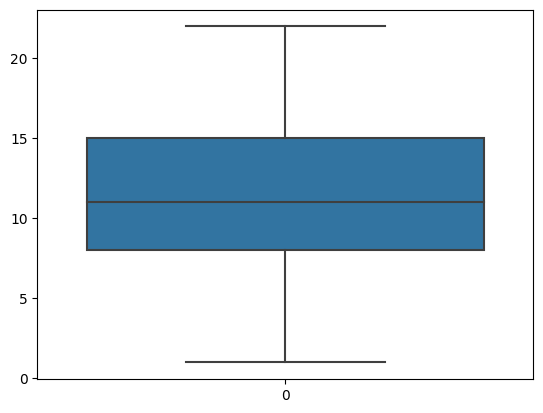

In [ ]:
sns.boxplot(new_cus['tenure'])

<Axes: >

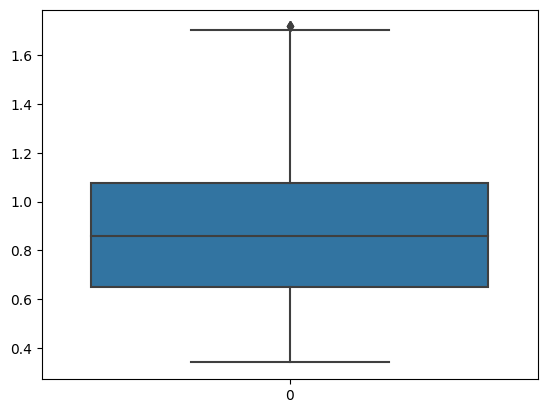

In [ ]:
sns.boxplot(new_cus['Value'])

In [365]:
new_cus.to_csv('NewCustomerList_Cleaned.csv', index=False)

# Transactions

In [ ]:
trans = pd.read_excel('Raw_data.xlsx', sheet_name= 'Transactions')

In [ ]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [ ]:
trans.shape

(20000, 13)

In [ ]:
trans.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date    datetime64[ns]
dtype: object

In [ ]:
trans.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000.000000,19803.000000,19803
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,1107.829449,556.046951,2004-07-31 18:38:13.834267392
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,1991-01-21 00:00:00
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,1997-08-25 00:00:00
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,2004-08-17 00:00:00
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,2011-05-09 00:00:00
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,2016-12-06 00:00:00
std,5773.647028,30.75359,1011.951046,NaN,0.500013,582.825242,405.955660,NaN


In [ ]:
trans.describe(include= 'object')

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [ ]:
print('Total number of records(rows):{}'. format(trans.shape[0]))
print('Total number of records(columns):{}'. format(trans.shape[1]))

Total number of records(rows):20000
Total number of records(columns):13


## 1. Missing Values Check

In [ ]:
trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [ ]:
trans.isnull().sum()/len(trans) * 100

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

<Axes: >

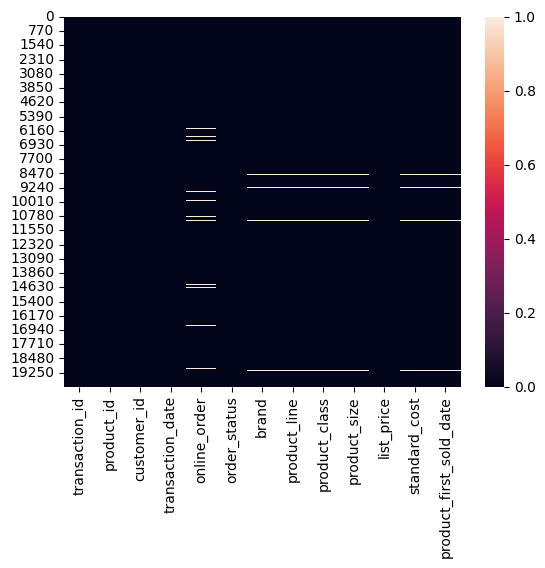

In [ ]:
sns.heatmap(trans.isnull())

### 1.1 Online Order

#### Since 1.8 % of the records have online_order data missing we can perform mode imputation for this categorical column.

In [ ]:
trans[trans['online_order'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,2003-07-21
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,2005-05-10
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2003-08-05
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,2015-05-21
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1997-01-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-21
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,2013-03-12
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,2012-06-04
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,2004-01-16


In [ ]:
online_order_mode = trans['online_order'].mode() [0]
online_order_mode

1.0

In [ ]:
trans['online_order'].fillna(online_order_mode, inplace = True )

In [ ]:
trans['online_order'].isnull().sum()

0

### 1.2 Brand, product_line, product_class, product_size

In [ ]:
# Set option to view all results
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
# Set option to view default results
pd.set_option('display.max_rows', 10 , "display.max_columns", None)

In [ ]:
trans[trans['brand'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaT
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaT
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaT
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaT
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaT
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaT
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaT
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaT


In [ ]:
trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date']].shape[0]

197

#### It is observed that when brand is null then all other column values with missing values viz. 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date' are also null. Also this null values comprise 1 % of the dataset. Hence we can drop these records/rows.

In [ ]:
drop_brand_index = trans[trans['brand'].isnull()].index
drop_brand_index

Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,  1282,
       ...
       19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859, 19871],
      dtype='int64', length=197)

In [ ]:
trans.drop(index=drop_brand_index, axis = 0, inplace = True)

In [ ]:
trans.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

## 2. Inconsistency Check

#### We will check whether there is inconsistent data / typo error data is present in the categorical columns. The columns to be checked are 'online_order', 'order_status' ,'product_line', 'product_class' , 'product_class' and 'brand'

In [ ]:
trans['online_order'].value_counts()

online_order
1.0    10097
0.0     9706
Name: count, dtype: int64

In [ ]:
trans['order_status'].value_counts()

order_status
Approved     19625
Cancelled      178
Name: count, dtype: int64

In [ ]:
# Set option to view default results
pd.set_option('display.max_rows', 10 , "display.max_columns", None)

In [ ]:
trans[['order_status', 'online_order']]

,order_status,online_order
0,Approved,0.0
1,Approved,1.0
2,Approved,0.0
3,Approved,0.0
4,Approved,1.0
...,...,...
19995,Approved,1.0
19996,Approved,1.0
19997,Approved,1.0
19998,Approved,0.0


In [ ]:
trans[['order_status', 'online_order']].drop_duplicates()

,order_status,online_order
0,Approved,0.0
1,Approved,1.0
42,Cancelled,0.0
254,Cancelled,1.0


In [ ]:
trans['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

In [ ]:
trans['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

In [ ]:
trans['brand'].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

In [ ]:
trans['product_first_sold_date'] = pd.to_datetime(trans['product_first_sold_date'])

## 3. Duplication Check

In [ ]:
trans_dedupped = trans.drop('transaction_id', axis = 1).drop_duplicates()
print("Number of records after removing transaction_id (pk), duplicates : {}".format(trans_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(trans.shape[0]))

Number of records after removing transaction_id (pk), duplicates : 19803
Number of records in original dataset : 19803


## 4. Outlier Check

<Axes: >

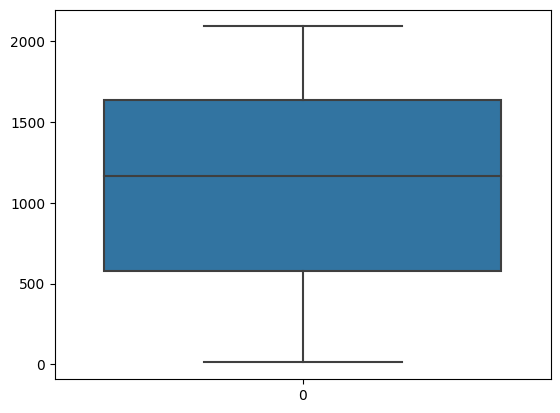

In [ ]:
sns.boxplot(trans['list_price'])

<Axes: >

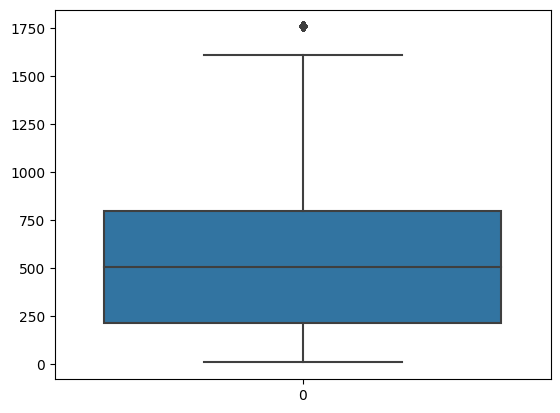

In [ ]:
sns.boxplot(trans['standard_cost'])

In [ ]:
standard_cost_index = trans[trans['standard_cost']>1600].index
standard_cost_index.value_counts()

59       1
13807    1
13682    1
13645    1
13475    1
        ..
6291     1
6281     1
6194     1
6147     1
19960    1
Name: count, Length: 395, dtype: int64

## 5. Creating a new feature "Profit"

In [ ]:
trans['Profit'] = trans['list_price']-trans['standard_cost']

<Axes: xlabel='Profit', ylabel='Density'>

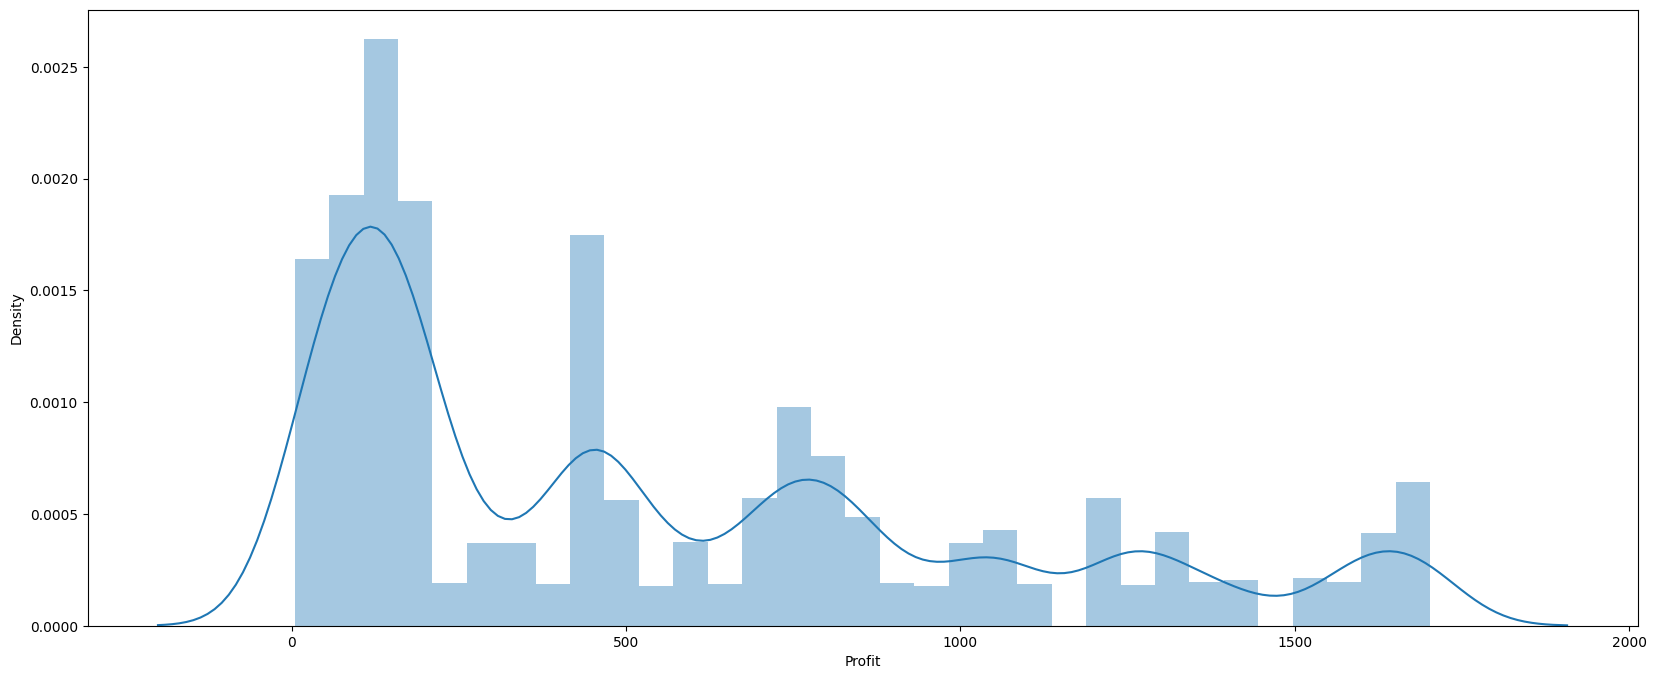

In [ ]:
# Dystribution of the Profit Column

plt.figure(figsize=(20,8))
sns.distplot(trans['Profit'])

In [ ]:
trans.to_csv('Transactions_Cleaned.csv', index=False)